# Imports and functions

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
citiesnp = np.genfromtxt('cities.csv', delimiter=',', skip_header = 1) # load as numpy array

In [3]:
def not_prime(n):
    if n == 2:
        return False
    if n % 2 == 0 or n <= 1:
        return True

    sqr = int(math.sqrt(n)) + 1

    for divisor in range(3, sqr, 2):
        if n % divisor == 0:
            return True
    return False

def is_prime(n):
    if n % 2 == 0 and n > 2: 
        return False
    return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))

np_not_prime = np.vectorize(not_prime)

nums = np.arange(0,len(citiesnp))

not_primes_bool = np_not_prime(nums)

def np_total_length(r, c):
    # v8
    r = np.concatenate(([0], r))
    c = c[r, :]
    cs = np.roll(c, -1, axis =0)
    cid = cs[:,0].astype(int)
    d = np.sqrt((c[:,1] - cs[:,1])**2 + (c[:,2] - cs[:,2])**2)
    idx = np.arange(9, len(c), 10)
    pc = cid[idx]
    sel = (idx+1)[not_primes_bool[pc]]
    d[sel-1] *= 1.1
    
    return np.sum(d)

In [4]:
np.random.seed(4)
idx = np.random.permutation(range(1, len(citiesnp)))

In [5]:
np_total_length(idx, citiesnp)

446925531.9322754

In [6]:
cities_sub = citiesnp[0:26]

In [7]:
np.random.seed(3)
idx = np.random.permutation(range(1,26))

In [8]:
np_total_length(idx, cities_sub)

60566.12398696876

# Simulated annealing

### Mutation

In [9]:
def shift_mutation(perm):
    n = len(perm)
    i = np.random.choice(n, 2, replace = False)
    i = np.sort(i)
    i0 = i[0]
    i1 = i[1]
    perm = np.concatenate((perm[i1:], perm[i0:i1], perm[:i0][::-1]))
    return perm

In [10]:
def swap_mutation(perm):
    n = len(perm)
    i = np.random.choice(n, 2, replace = False)
    perm[i] = perm[i[::-1]]
    return perm

In [11]:
def reverse_mutation(perm):
    n = len(perm) - 1
    i = np.random.choice(n, 1)[0]
    perm[i:i+2] = perm[i:i+2][::-1]
    return(perm)

## SA

In [44]:
def SA(array, fit_fun, mut_fun, maxIter, maxIterNoChange=200,
       tmin = 0.01, alpha = 0.999, t_init = 1000, verbose = False):
    # initialize solution
    perm = np.random.permutation(range(1, len(array))) 
    
    n = len(perm)
    
    # init temperature
    tem = t_init   
    
    dist = fit_fun(perm, array) # objective function
    best_dist = dist
    best_trace = np.array([dist] )
    current_trace  = np.array([dist])
    
    citer = 0
    iterNoChange = 0
    
    while tem >= tmin:   
        
        # mutate
        newperm = mut_fun(perm)
        
        dist_new = fit_fun(newperm, array)
        # print(newperm)
        # print(dist_new)
    
        if dist_new <= best_dist:
            #print(dist_new)
            # print('New is best')
            perm = newperm
            dist = dist_new
            best_dist = dist
            iterNoChange = 0
        elif (np.exp((dist-dist_new) / tem) > np.random.uniform()):
            
            # print('New is worse')
            dist = dist_new
            perm  = newperm
            #iterNoChange = 0
        
        # print('Current dist: ', dist, 'Best dist: ', best_dist)
        best_trace = np.concatenate((best_trace, [best_dist]))
        current_trace = np.concatenate((current_trace, [dist]))
        tem *= alpha 
        
        if (citer % 100 == 0) and verbose:
            print('Iter: {}, IterNoChange: {}, Current: {}, Best: {}'.format(citer, iterNoChange, dist, best_dist))
            
        citer += 1
        iterNoChange += 1
        if (iterNoChange >= maxIterNoChange) or (citer >= maxIter):
            break
            
        # res = list(route=path, traceBest = traceBest, trace = traceCurrentLength)
    return perm, best_trace, current_trace

In [34]:
def plot_SA(b, c, n):
    fig, ax = plt.subplots(figsize=(10,6))

    x = np.arange(0, len(c), n)
    l2 = ax.plot(x, b[::n])[0]
    l3 = ax.plot(x, c[::n])[0]
    
    line_labels = ["Best", "Current"]
    
    fig.legend([l2, l3], line_labels, bbox_to_anchor=(0.85, 0.25))
    
    plt.show()

##  Testing

In [70]:
np.random.seed(11)
a1, b1, c1 = SA(cities_sub, np_total_length, shift_mutation,
             maxIter = np.inf, maxIterNoChange=30000, t_init = 100000, alpha = 0.9999, verbose = 0)

In [71]:
b1[0], b1[-1], len(c1)

(57814.26307994567, 18886.752658862257, 99018)

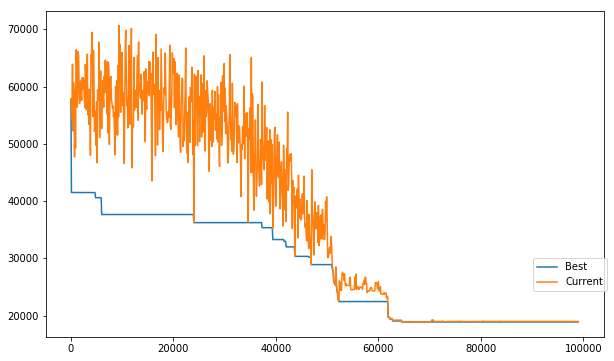

In [72]:
plot_SA(b1, c1, 100)

In [78]:
np.random.seed(4)
a2, b2, c2 = SA(citiesnp,  np_total_length, shift_mutation, maxIter = np.inf,
                maxIterNoChange=5000, t_init = 100000, alpha = 0.9999, verbose = True)

Iter: 0, IterNoChange: 0, Current: 446924211.74181736, Best: 446924211.74181736
Iter: 100, IterNoChange: 22, Current: 446862154.3152707, Best: 446850743.8163469
Iter: 200, IterNoChange: 122, Current: 446926321.9443539, Best: 446850743.8163469
Iter: 300, IterNoChange: 222, Current: 446924954.77965057, Best: 446850743.8163469
Iter: 400, IterNoChange: 322, Current: 446897969.56370306, Best: 446850743.8163469
Iter: 500, IterNoChange: 422, Current: 446900605.10505563, Best: 446850743.8163469
Iter: 600, IterNoChange: 46, Current: 446890243.1034914, Best: 446820673.97737813
Iter: 700, IterNoChange: 146, Current: 446846904.3506852, Best: 446820673.97737813
Iter: 800, IterNoChange: 25, Current: 446785456.688378, Best: 446785274.06624985
Iter: 900, IterNoChange: 5, Current: 446794051.5932973, Best: 446755442.3594185
Iter: 1000, IterNoChange: 38, Current: 446780734.9865667, Best: 446735942.3810544
Iter: 1100, IterNoChange: 32, Current: 446754841.29772735, Best: 446725154.6277808
Iter: 1200, IterN

In [79]:
b2[0], b2[-1], len(b2)

(446925531.9322754, 446663150.6184944, 8714)

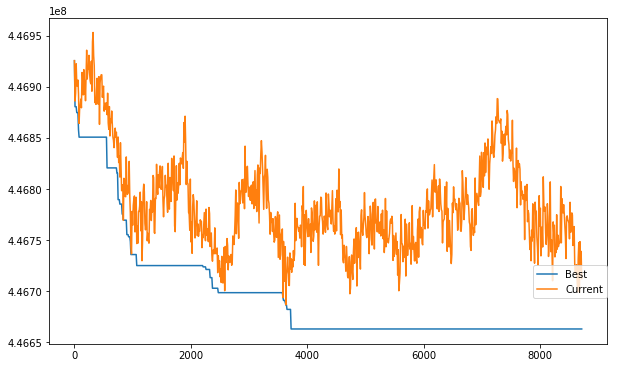

In [80]:
plot_SA(b2, c2, 10)

In [17]:
np.random.seed(4)
a2, b2, c2 = SA(citiesnp,  np_total_length, swap_mutation, maxIter = 20000,
                maxIterNoChange=500, t_init = 10000, alpha = 0.9999, verbose = True)

Iter: 0, IterNoChange: 0, Current: 446926120.895808, Best: 446925531.9322754
Iter: 100, IterNoChange: 0, Current: 446929565.5846412, Best: 446892457.7677954
Iter: 200, IterNoChange: 0, Current: 446952262.68835175, Best: 446892457.7677954
Iter: 300, IterNoChange: 0, Current: 446958968.9824207, Best: 446892457.7677954
Iter: 400, IterNoChange: 0, Current: 446978880.019784, Best: 446892457.7677954
Iter: 500, IterNoChange: 0, Current: 446981221.5638023, Best: 446892457.7677954


KeyboardInterrupt: 

In [19]:
b2[0], b2[-1], len(b2)

(446925531.9322754, 446444309.8069559, 8107)

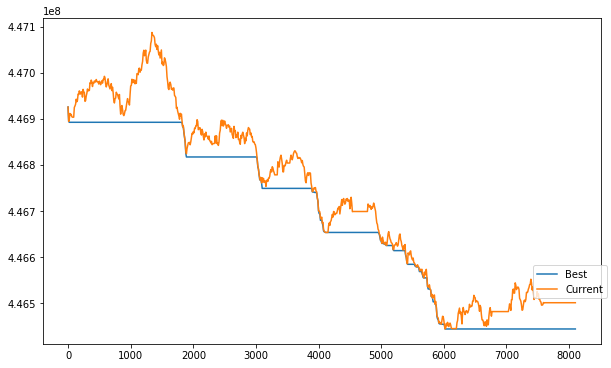

In [20]:
plot_SA(b2, c2, 10)